# <font color = "ff0055">EXPLORATORY DATA ANALYSIS ON A DATASET

# <font color = "ff0055"> Objective:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.
Dataset:


## <font color = "ff0055"> 0.1 Table of Contents<a class="anchor" id="0.1"></a>

1. [Case Summary](#1)
    - 1.1 [Data Discription](#1.1)
2. [Data Explortaion](#2)
    - 2.1 [Descriptive statistics](#2.1)
3. [Data Cleansing](#3)
    - 3.1 [Duplicate Values](#3.1)
    - 3.2 [Missing Values](#3.2)
    - 3.3 [Outlier Detection](#3.3)
4. [Data Visualization](#4)
    - 4.1 [BoxPlot](4.1)
    - 4.2 [Kernal density](#4.2)
    - 4.3 [DistPlote](#4.3)
    - 4.4 [ScatterPlot](#4.4)
    - 4.5 [PairPlot](#4.5)
    - 4.6 [HeatMap](#4.6)
5. [Conclusion:](#5)
    - 5.1 [Key findings](#5.1)
    - 5.2 [Summary ](#5.2)

# <font color = "ff0055"> Importing Tools and Libraries

In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import statsmodels.formula.api as sm

In [38]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)

# <font color = "ff0055"> Given Data 

In [40]:
data = pd.DataFrame(pd.read_csv("C:/Users/hp/Desktop/assignments/EDA1/Cardiotocographic.csv"))

In [41]:
data1=data.copy()
data1

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0     0.5   43.000000  2.4   64.0   0.999926  2.000000  
1     2.1   0.000000   10.4  130.0  0.000000  1.000000  
2     2.1   0.000000   13.4  130.0  0.000000  1.000000  
3     2.4   0.000000   23.0  117.0  1.000000  1.000000  
4     2.4   0.000000   19.9  117.0  1.000000  1.000000  
...   ...        ...    ...    ...       ...       ...  
2121  0.2   25.000000  7.2   40.0   0.000000  2.000000  
2122  0.4   22.000000  7.1   66.0   1.000000  2.000000  
2123  0.4   20.000000  6.1   67.0   1.000000  1.990464  
2124  0.4   27.000000  7.0   66.0   1.000000  2.000000  
2125  0.4   35.857183  5.0   42.0   0.000000  1.000000  

[2126 rows x 14 columns]

# <font color = "ff0055"> CASE SUMMARY: Analysis of the "cardiographic.csv" Dataset <a class="anchor" id="1"></a>
### <font color = "ff0055"> Detailed Findings:

 - Outliers:
    Columns such as Cholesterol, RestingBP, MaxHR, Oldpeak, DL (Decelerations Late), DS (Decelerations Short), and DP (Decelerations Prolonged) contain notable outliers.

 - Example: The Cholesterol column showed extreme values far beyond the typical range, which could indicate measurement errors or true extreme cases.

 - Missing Values:Several columns had varying levels of missing data.

 - Example: The Oldpeak column had a significant number of missing values, necessitating careful consideration for imputation or exclusion.

 - Zero Statistics:Certain columns, potentially DL, DS, and DP, had zero values for mean, median, and standard deviation, indicating all values in these columns might be zeros or have no variability.

# <font color = "ff0055"> DATA DESCRIPTION:<a class="anchor" id="1.1"></a>

### 
1.LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.

2.AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.

3.FM - May indicate "Fetal Movements" detected by the monitor.

4.UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.

5.DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.

6.DS - May represent "Decelerations Short" or decelerations of brief duration.

7.DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.

8.ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.

9.MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.

10.ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.

11.MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.



#### [Table of Contents](#0.1)

# <font color = "ff0055"> DATA EXPLORATION <a class="anchor" id="2"></a>

# <font color = "ff0055"> Kernel Density For Every Column

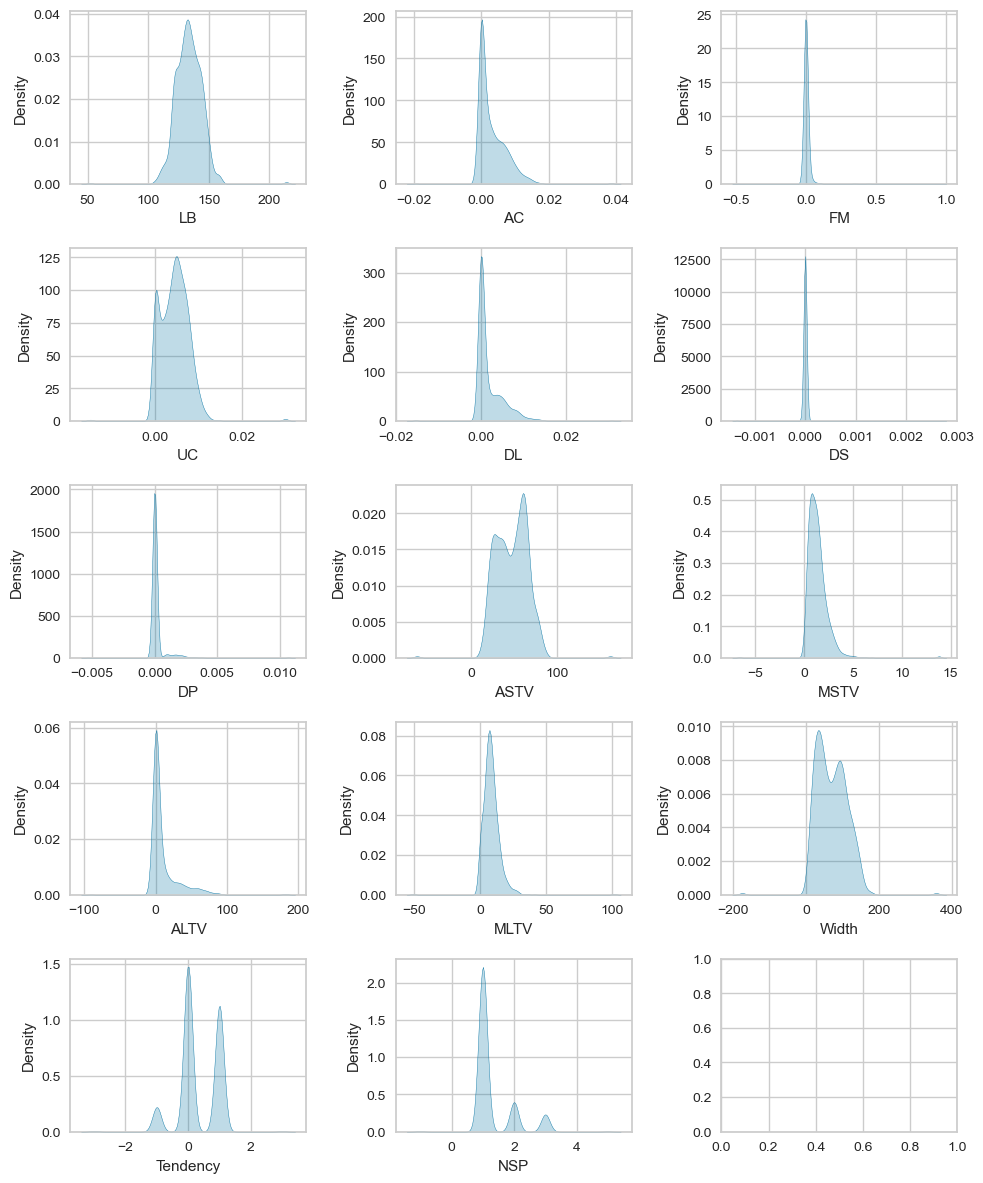

In [42]:
# Create a 5*3 grid of subplots
fig, axes = plt.subplots(5,3, figsize=(10,12))  # 2 rows, 3 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create KDE plots
for ax, col in zip(axes, data1.columns):
    sns.kdeplot(data=data1[col], ax=ax, shade=True)  # Plot KDE on the specified subplot
    ax.set_ylabel('Density')  # KDE plots often use "Density" as y-axis label

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

# <font color = "ff0055"> Distplot To Visualize The Distribution

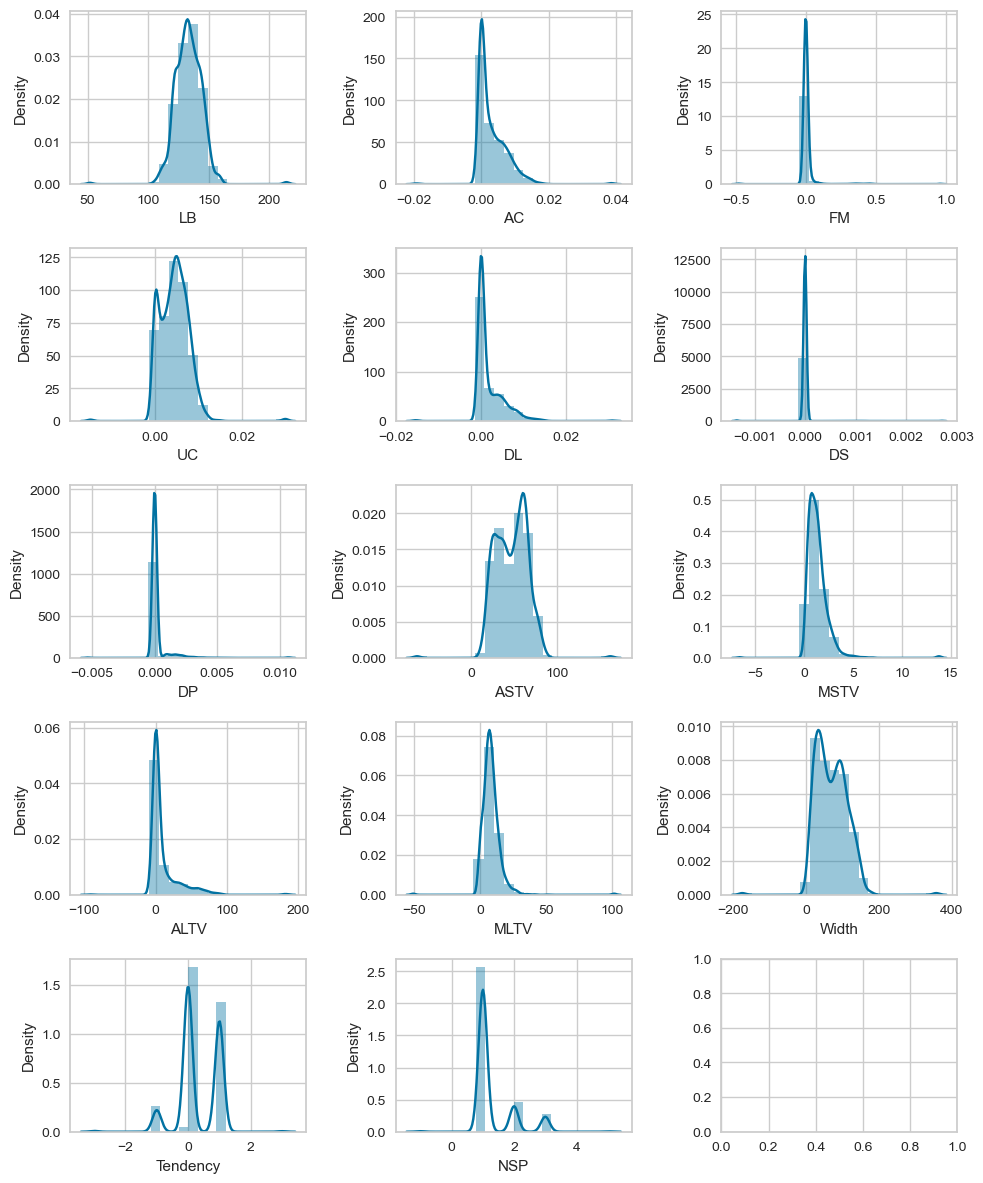

In [43]:
fig, axes = plt.subplots(5,3, figsize=(10,12))  # 2 rows, 3 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create KDE plots
for ax, col in zip(axes, data1.columns):
    sns.distplot(data1[col], ax=ax, bins=20)  # Plot KDE on the specified subplot
    ax.set_ylabel('Density')  # KDE plots often use "Density" as y-axis label

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

# <font color = "ff0055"> scatterplot for analyzing outliers

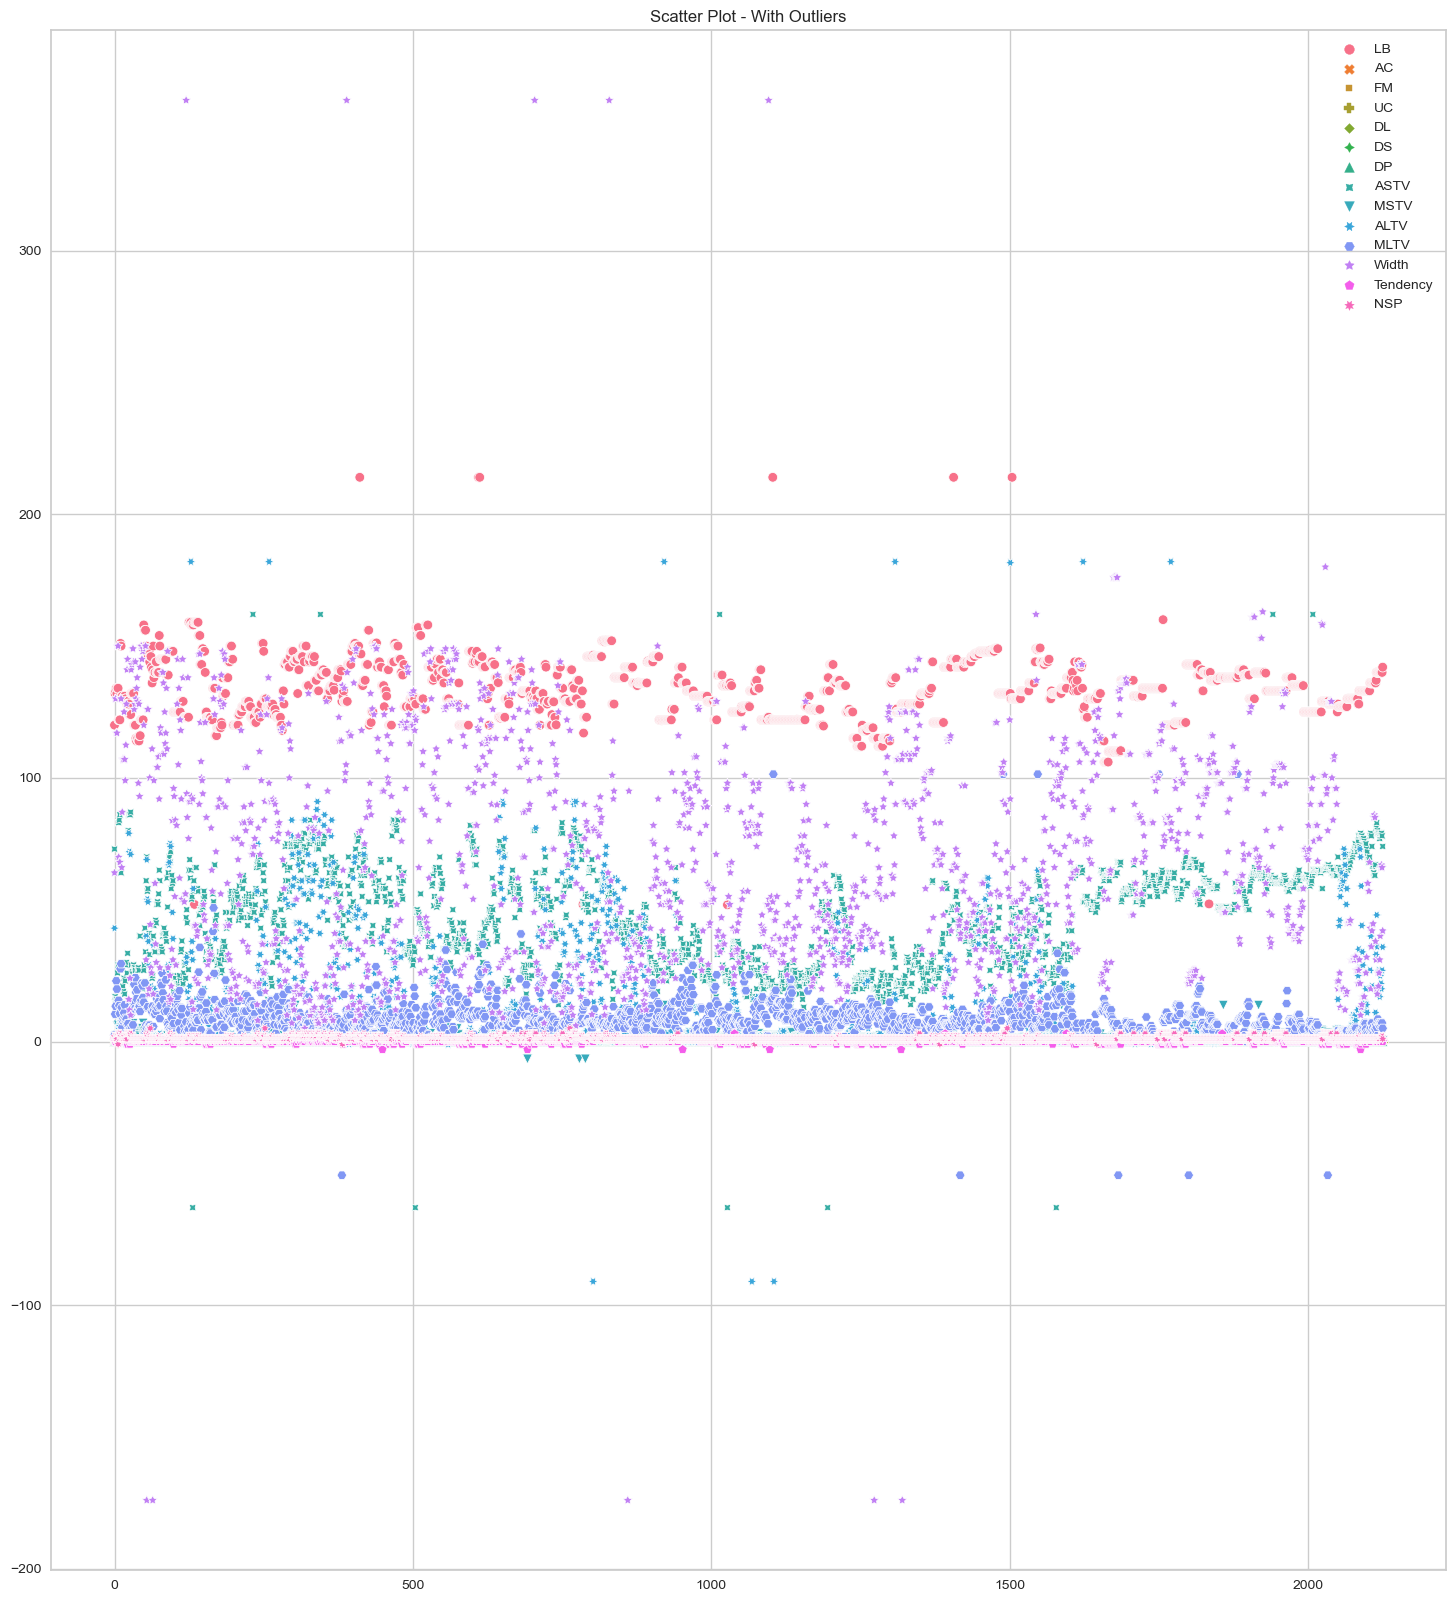

In [44]:
plt.figure(figsize=(18, 20))
sns.scatterplot(data=data1)
plt.title("Scatter Plot - With Outliers")
plt.show()

# <font color = "ff0055"> Descriptive statistics:<a class="anchor" id="2.1"></a>

In [45]:
data1.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean   133.343598   0.003219     0.009894     0.004391     0.001895      
std    11.270154    0.004391     0.067540     0.003340     0.003343      
min    51.842487   -0.019284    -0.480634    -0.014925    -0.015393      
25%    126.000000   0.000000     0.000000     0.001851     0.000000      
50%    133.000000   0.001634     0.000000     0.004484     0.000000      
75%    140.000000   0.005650     0.002567     0.006536     0.003289      
max    214.000000   0.038567     0.961268     0.030002     0.030769      

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean   0.000003     0.000175     46.995984    1.364378     10.285964     
std    0.000142     0.000840     18.813973    1.173632     21.205041     
min   -0.001353    -0.005348    -63.000000   -6.600000    -91.000000     
25%    0.000000     0.000000     32.000000    0.700000     0.000000      
50%    0.000000     0.000000     49.000000    1.200000     0.000000      
75%    0.000000     0.000000     61.000000    1.700000     11.000000     
max    0.002706     0.010695     162.000000   13.800000    182.000000    

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean   8.284887     70.429260    0.316371     1.304507     
std    7.772858     42.931822    0.645622     0.644619     
min   -50.700000   -174.000000  -3.000000    -1.025988     
25%    4.600000     37.000000    0.000000     1.000000     
50%    7.400000     67.000000    0.000000     1.000000     
75%    10.900000    100.000000   1.000000     1.000000     
max    101.400000   357.000000   3.000000     5.000000

In [46]:
data1.head(10)

LB        AC   FM        UC        DL   DS        DP  ASTV  MSTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000  73.0  0.5    
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.000000  17.0  2.1    
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.000000  16.0  2.1    
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.000000  16.0  2.4    
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.000000  16.0  2.4    
5  134.000000  0.001116  0.0  0.010493  0.009444  0.0  0.002099  26.0  5.9    
6  134.000000  0.001403  0.0  0.012623  0.008415  0.0  0.002805  29.0  6.3    
7  122.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000  83.0  0.5    
8  122.000000  0.038567  0.0  0.001517  0.000000  0.0  0.000000  84.0  0.5    
9  122.000000  0.000000  0.0  0.002967  0.000000  0.0  0.000000  86.0  0.3    

   ALTV  MLTV       Width  Tendency       NSP  
0  43.0  2.4   64.000000   0.999926  2.000000  
1  0.0   10.4  130.000000  0.000000  1.000000  
2  0.0   13.4  130.000000  0.000000  1.000000  
3  0.0   23.0  117.000000  1.000000  1.000000  
4  0.0   19.9  117.000000  1.000000  1.000000  
5  0.0   0.0   150.000000  0.000000  3.000000  
6  0.0   0.0   150.000000  0.000000 -1.025988  
7  6.0   15.6  69.920261   1.000000  3.000000  
8  5.0   13.6  68.000000   1.000000  3.000000  
9  6.0   10.6  68.000000   1.000000  3.000000

In [47]:
data1.tail(10)

LB        AC        FM        UC        DL   DS   DP  ASTV  MSTV  \
2116  140.0  0.003968  0.000000  0.003968  0.000000  0.0  0.0  80.0  0.2    
2117  140.0  0.000000  0.000000  0.007812  0.000000  0.0  0.0  79.0  0.3    
2118  140.0  0.000000  0.000000  0.006470  0.000898  0.0  0.0  79.0  0.5    
2119  140.0  0.000000  0.000000  0.006764  0.001127  0.0  0.0  79.0  0.6    
2120  140.0  0.000000  0.000000  0.004975  0.001244  0.0  0.0  77.0  0.7    
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0  0.2    
2122  140.0  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0  0.4    
2123  140.0  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0  0.4    
2124  140.0  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0  0.4    
2125  142.0  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0  0.4    

           ALTV  MLTV  Width  Tendency       NSP  
2116  36.000000  2.2   18.0   0.000000  1.000000  
2117  20.000000  8.5   26.0   1.002932  1.000000  
2118  26.428179  7.0   21.0   1.000000  1.000000  
2119  27.000000  6.4   26.0   1.000000  1.000000  
2120  17.000000  6.0   31.0   0.000000  1.000000  
2121  25.000000  7.2   40.0   0.000000  2.000000  
2122  22.000000  7.1   66.0   1.000000  2.000000  
2123  20.000000  6.1   67.0   1.000000  1.990464  
2124  27.000000  7.0   66.0   1.000000  2.000000  
2125  35.857183  5.0   42.0   0.000000  1.000000

In [48]:
data1.dtypes # checking data types 

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [49]:
data1.info() # checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


####  [Table of Contents](#0.1)

# <font color = "ff0055"> Data cleansing:<a class="anchor" id="3"></a>

# <font color = "ff0055"> Duplicate Values<a class="anchor" id="3.1"></a>
### <font color = "ff0055"> Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used

In [50]:
data1.duplicated().sum()# checking for duplicate data

2

In [51]:
data1[data1.duplicated()].shape#there are two duplicate values found wich is 

(2, 14)

In [52]:
data1[data1.duplicated(keep=False)] #printing the duplicate values

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1113  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0  1.9   0.0   15.1   
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0  1.9   0.0   15.1   
1457  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0  0.9   0.0   10.6   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0  0.9   0.0   10.6   

      Width  Tendency  NSP  
1113  39.0   0.0       1.0  
1115  39.0   0.0       1.0  
1457  35.0   0.0       1.0  
1458  35.0   0.0       1.0

### <font color = "ff0055">  we can remove duplicate value in varies rows using the drop_duplicates() function. By default, it keeps the first occurrence and removes the rest. You can change this behavior by using the keep parameter. 

In [53]:
data_cleaned1 = data1.drop_duplicates() # drop the duplicate values 

In [54]:
data_cleaned1[data_cleaned1.duplicated()] # additionaly we checking any duplicate values

Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []

### <font color = "ff0055"> finaly we don't have any duplicate values in data_cleaned1 dataset so we go next step

# <font color = "ff0055"> CHECKING FOR MISSING VALUES <a class="anchor" id="3.1"></a>

### <font color = "ff0055"> Missing Values:

 - Extent: Multiple columns in the dataset have missing values. The proportion of missing data varies across columns.

 - Identification: Missing values were identified using the isnull().sum() method, which highlighted the count of missing entries in each column.

 - Handling: Strategies to handle missing values include imputation (using mean, median, or mode), deletion of rows/columns, or using algorithms that support missing values inherently.

In [55]:
data_cleaned1.isnull().sum().sum() # calculat total null values

167

# <font color = "ff0055"> Heatmap to visualyze missing values

<Axes: >

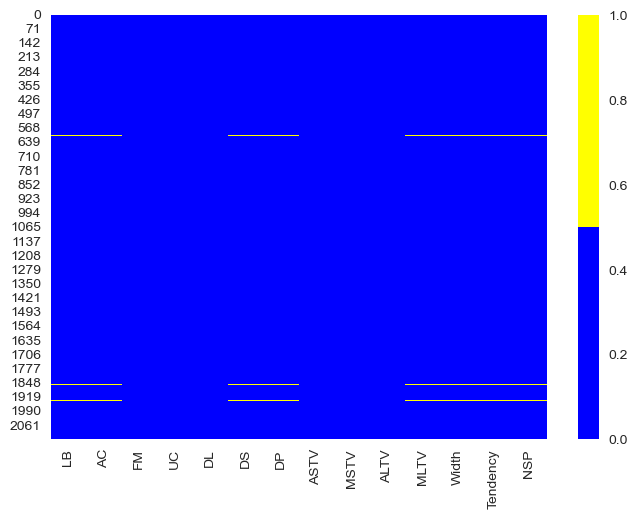

In [56]:
col=data_cleaned1.columns #Lets analyze the nullvalues by creating heatmap to understand null values distribution
colors=["blue","yellow"]
sns.heatmap(data=data_cleaned1[col].isnull(),cmap=sns.color_palette(colors))

In [57]:
null_data = data_cleaned1[data_cleaned1.isnull().any(axis=1)]#print total null values in rows & columns
null_data

LB        AC        FM        UC        DL  DS  DP       ASTV      MSTV  \
50   NaN NaN        0.000000  0.008086  0.000000 NaN NaN  29.000000  1.300000   
116  NaN  0.038567  0.000000  0.006993  0.002331 NaN NaN  26.000000  4.300000   
126  NaN NaN        0.000000  0.004380  0.000000 NaN NaN  69.000000  0.300000   
201  NaN NaN        0.016393  0.000000  0.000000 NaN NaN  56.000000  0.500000   
566  NaN NaN        0.000000  0.004115  0.005487 NaN NaN  43.000000  2.500000   
574  NaN NaN        0.000000  0.002611  0.002611 NaN NaN  34.000000  4.900000   
603  NaN NaN        0.006519  0.001304  0.001304 NaN NaN  73.000000  0.700000   
935  NaN NaN        0.000000  0.005495  0.001374 NaN NaN  30.000000  1.251793   
936  NaN NaN        0.000000  0.007802  0.000000 NaN NaN  33.000000  1.000000   
1013 NaN NaN        0.000000  0.003861  0.000000 NaN NaN  34.000000  1.000000   
1205 NaN NaN       -0.000129  0.006424  0.000000 NaN NaN  63.000000  0.500000   
1332 NaN NaN        0.010204  0.002551  0.005102 NaN NaN  27.000000  1.900000   
1347 NaN NaN        0.018519  0.003466  0.002315 NaN NaN  30.000000  2.100000   
1430 NaN NaN       -0.001442  0.005038  0.000000 NaN NaN  42.000000  0.700000   
1636 NaN NaN        0.005650  0.004708  0.001883 NaN NaN  51.000000  2.800000   
1645 NaN NaN        0.000000  0.005015  0.005015 NaN NaN  51.000000  1.500000   
1792 NaN NaN        0.001029  0.003086  0.011317 NaN NaN  67.000000  2.100000   
1854 NaN NaN        0.000000  0.006369  0.000796 NaN NaN  51.000000  1.200000   
1863 NaN NaN        0.000000  0.003257  0.000000 NaN NaN  51.000000  1.000000   
1928 NaN NaN        0.002976  0.004960  0.002976 NaN NaN  63.000000  1.700000   
1934 NaN NaN        0.003049  0.009146  0.003811 NaN NaN  61.926728  2.500000   

           ALTV  MLTV  Width  Tendency  NSP  
50    0.000000  NaN   NaN    NaN       NaN   
116   0.532872  NaN   NaN    NaN       NaN   
126   21.000000 NaN   NaN    NaN       NaN   
201   12.000000 NaN   NaN    NaN       NaN   
566   0.000000  NaN   NaN    NaN       NaN   
574   0.000000  NaN   NaN    NaN       NaN   
603   0.000000  NaN   NaN    NaN       NaN   
935   0.000000  NaN   NaN    NaN       NaN   
936   0.000000  NaN   NaN    NaN       NaN   
1013  0.000000  NaN   NaN    NaN       NaN   
1205  35.000000 NaN   NaN    NaN       NaN   
1332  0.000000  NaN   NaN    NaN       NaN   
1347  0.000000  NaN   NaN    NaN       NaN   
1430  0.000000  NaN   NaN    NaN       NaN   
1636  0.000000  NaN   NaN    NaN       NaN   
1645  0.000000  NaN   NaN    NaN       NaN   
1792  0.000000  NaN   NaN    NaN       NaN   
1854  0.000000  NaN   NaN    NaN       NaN   
1863  0.000000  NaN   NaN    NaN       NaN   
1928  5.000000  NaN   NaN    NaN       NaN   
1934  0.000000  NaN   NaN    NaN       NaN

In [58]:
round((null_data.size/data_cleaned1.size)*100,4)# checking null values percentage of total data 

0.9887

In [59]:
# we have to drop the null value 
data_cleaned2=data_cleaned1.copy()

In [60]:
data_cleaned2=data_cleaned1.dropna()# after null values droped we have total data
data_cleaned2

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0     0.5   43.000000  2.4   64.0   0.999926  2.000000  
1     2.1   0.000000   10.4  130.0  0.000000  1.000000  
2     2.1   0.000000   13.4  130.0  0.000000  1.000000  
3     2.4   0.000000   23.0  117.0  1.000000  1.000000  
4     2.4   0.000000   19.9  117.0  1.000000  1.000000  
...   ...        ...    ...    ...       ...       ...  
2121  0.2   25.000000  7.2   40.0   0.000000  2.000000  
2122  0.4   22.000000  7.1   66.0   1.000000  2.000000  
2123  0.4   20.000000  6.1   67.0   1.000000  1.990464  
2124  0.4   27.000000  7.0   66.0   1.000000  2.000000  
2125  0.4   35.857183  5.0   42.0   0.000000  1.000000  

[2103 rows x 14 columns]

In [61]:
data_cleaned2.isnull().sum() # additionaly checking any null values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

 # <font color = "ff0055"> Columns with Zero Statistics:<a class="anchor" id="3.2"></a>

 - Mean, Median, and Standard Deviation: Some columns have mean, median, and standard deviation values equal to zero.

### <font color = "ff0055">  Interpretation:

 - Mean and Median as Zero: This indicates that all entries in these columns might be zeros or there is a large number of zero values skewing these statistics.

 - Standard Deviation as Zero: A zero standard deviation indicates no variability, meaning all values in the column are the same.

### <font color = "ff0055"> Impact:
 - Such columns might be constant or have a high prevalence of a single value (e.g., all zeros), providing no useful information for analysis or modeling.

{'whiskers': [<matplotlib.lines.Line2D at 0x27f3d95c850>,
 'caps': [<matplotlib.lines.Line2D at 0x27f3d95d990>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f3d95c290>],
 'medians': [<matplotlib.lines.Line2D at 0x27f3d95ec90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f3d95f3d0>],
 'means': []}

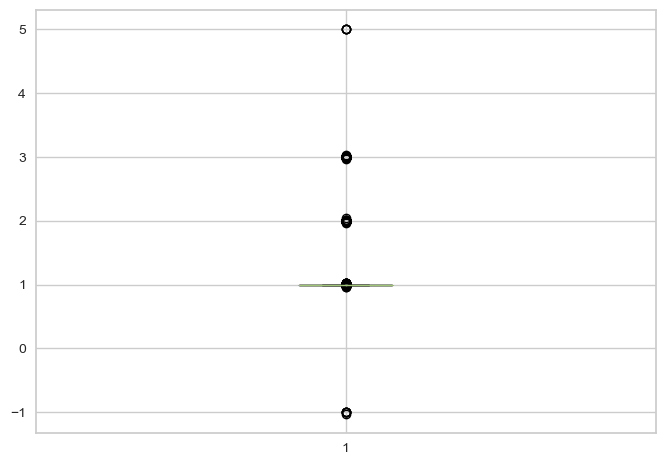

In [62]:

plt.boxplot(data_cleaned2["NSP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27f3d81ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x27f3d81bed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f3d81a750>],
 'medians': [<matplotlib.lines.Line2D at 0x27f3d800fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f3da317d0>],
 'means': []}

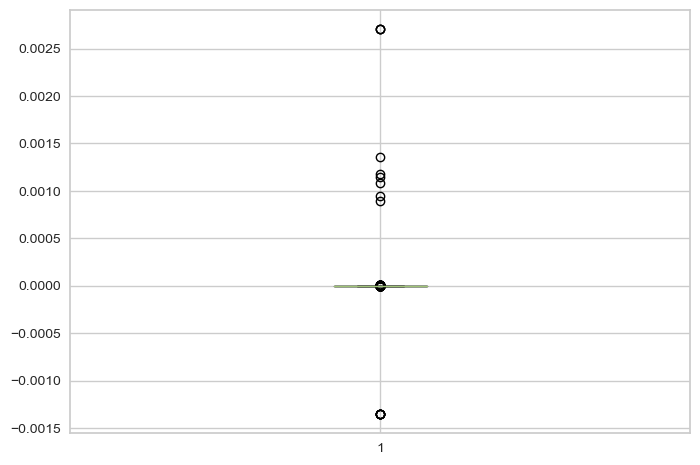

In [63]:
plt.boxplot(data_cleaned2["DS"])


{'whiskers': [<matplotlib.lines.Line2D at 0x27f3d7ae610>,
 'caps': [<matplotlib.lines.Line2D at 0x27f3d7afa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f3d7ad6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27f3d790a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f3d7af750>],
 'means': []}

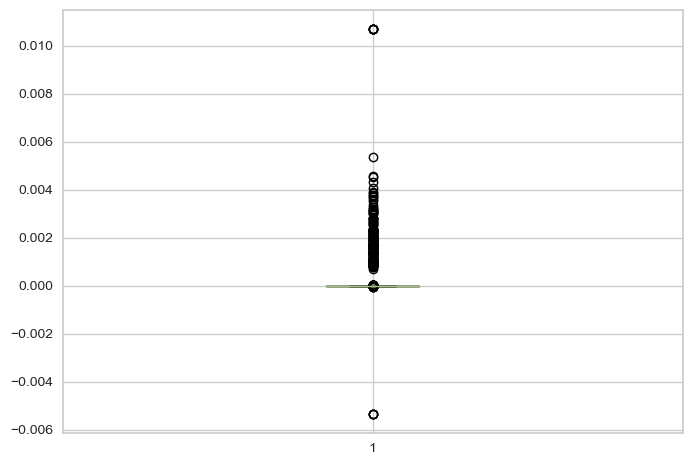

In [64]:
plt.boxplot(data_cleaned2["DP"])


{'whiskers': [<matplotlib.lines.Line2D at 0x27f3d837390>,
 'caps': [<matplotlib.lines.Line2D at 0x27f3d844610>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f3d758750>],
 'medians': [<matplotlib.lines.Line2D at 0x27f3d845750>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f3d765c10>],
 'means': []}

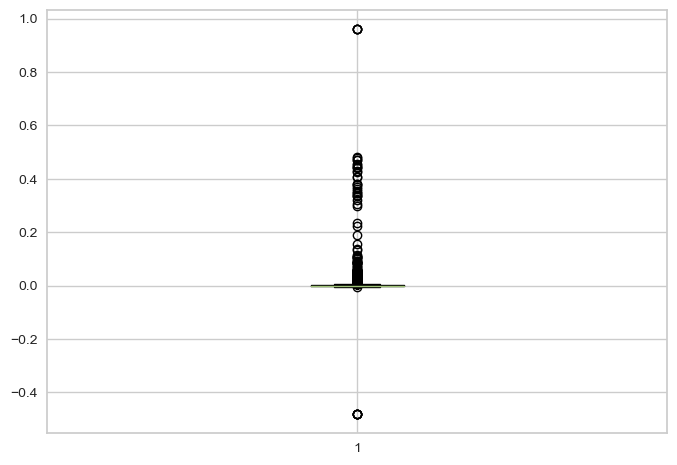

In [65]:
plt.boxplot(data_cleaned2["FM"])

### Mean, Median, and Standard Deviation: NSP,DS,DP,FM columns have mean, median, and standard deviation values equal to zero

# <font color = "ff0055"> CHECKING FOR OUTLIERS <a class="anchor" id="3.3"></a>

### <font color = "ff0055"> Outliers:

Prevalence: Numerous columns contain significant outliers, which can potentially skew the analysis and affect the accuracy of any predictive models.

Detection: Outliers were identified using visualizations such as box plots and statistical measures like the interquartile range (IQR).

Impact: These outliers can indicate abnormal data entries or genuine rare events, which require careful consideration. Depending on the context, outliers may need to be treated by either transformation, capping, or removal.

# <font color = "ff0055"> Boxplot For Analyzing Outliers

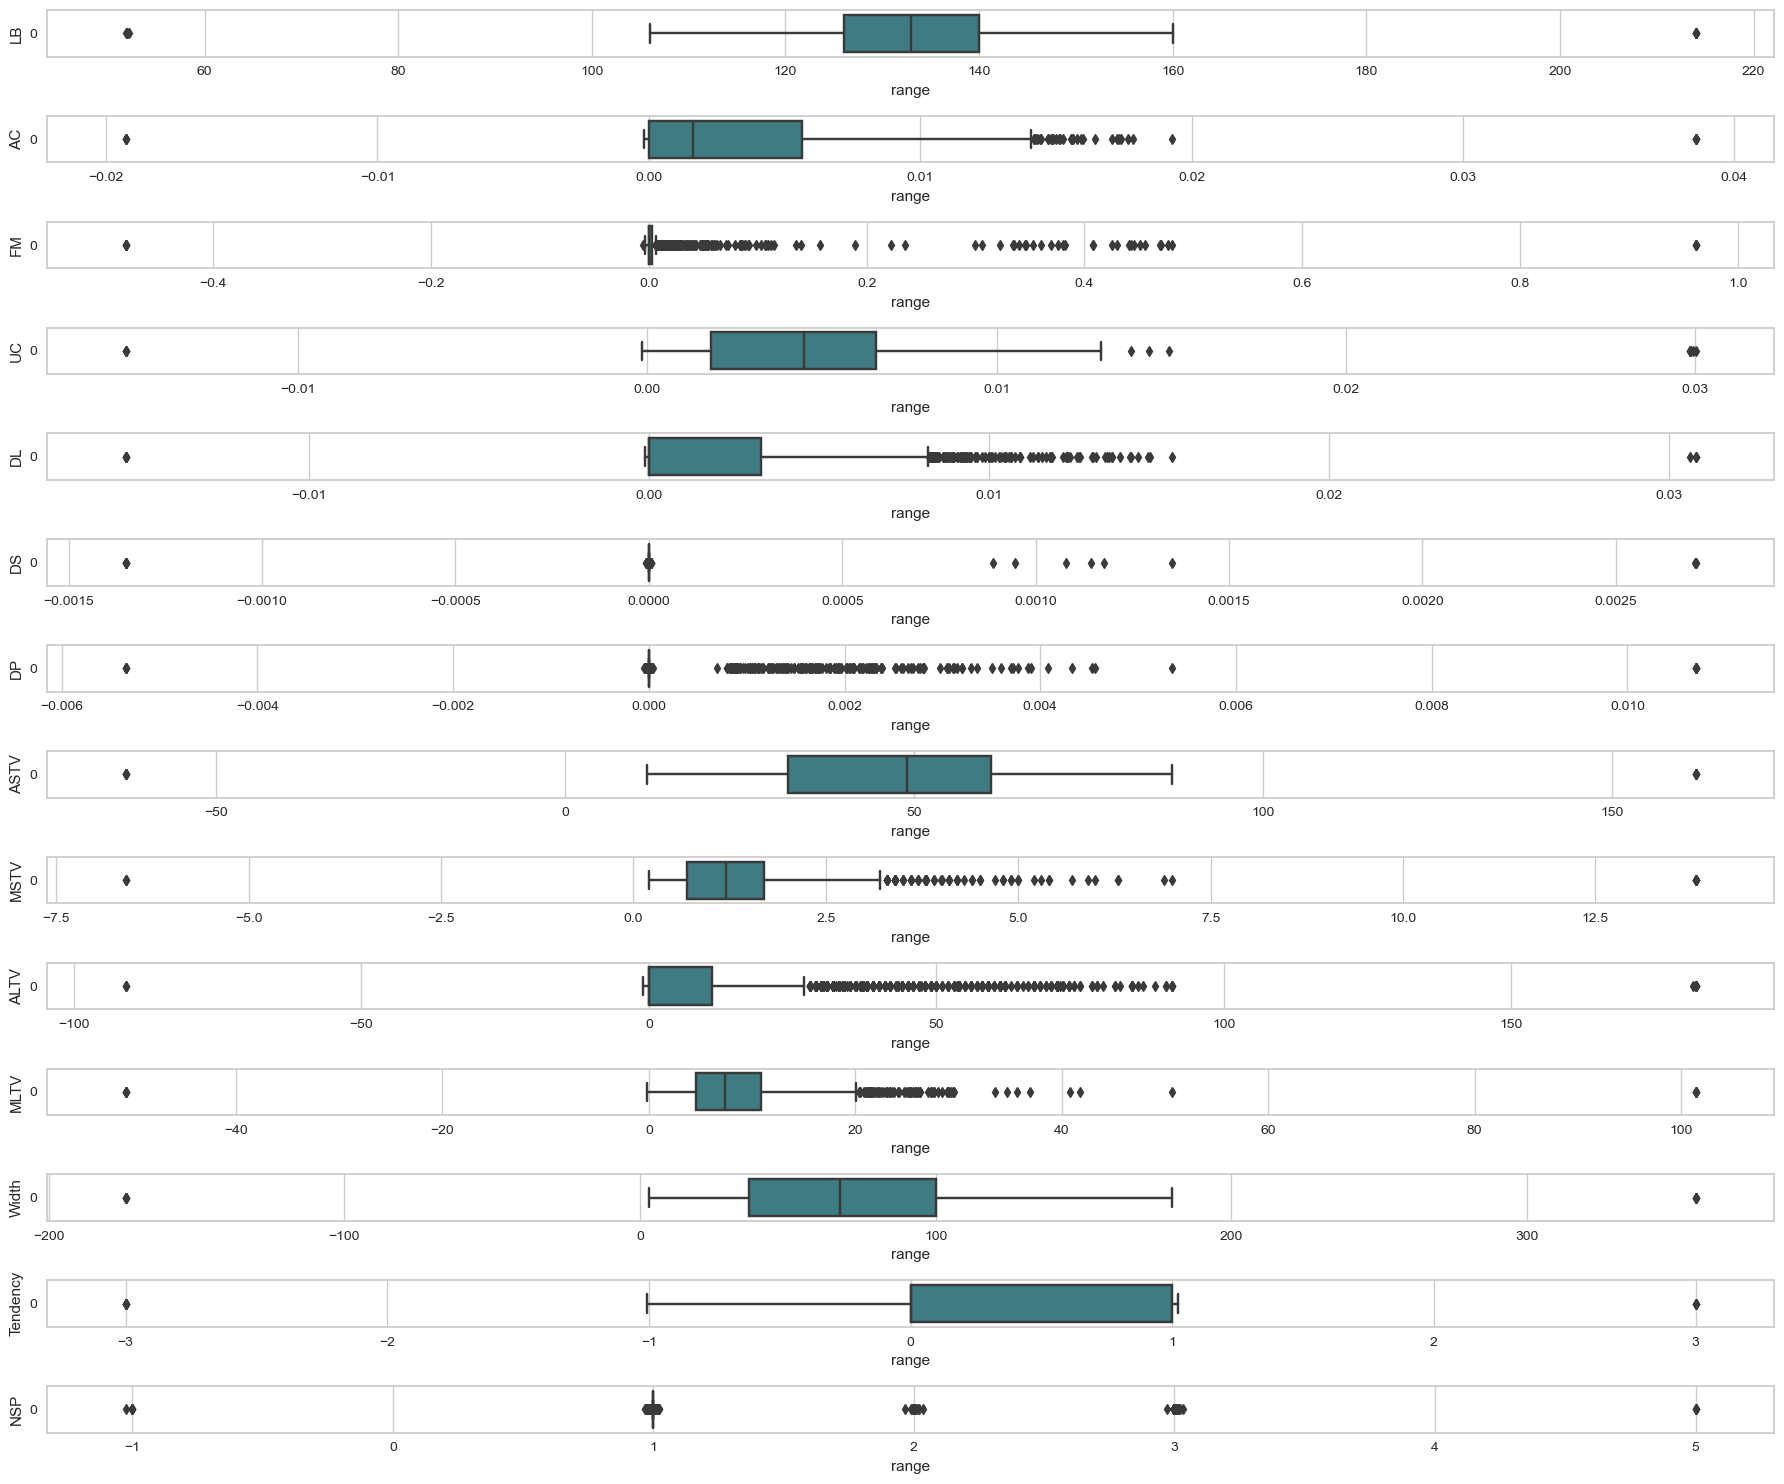

In [66]:
fig, axes = plt.subplots(14,1, figsize=(18,15) )  # 10 rows, 1 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create box plots
for ax, col in zip(axes, data_cleaned2.columns):
    sns.boxplot(data_cleaned2[col], palette = "crest", ax=ax, orient="h")  # Plot plot on the specified subplot
    ax.set_ylabel(col)  # box plots often use "range" as y-axis label
    ax.set_xlabel("range")

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

In [67]:
print(data_cleaned2.shape)
print(data_cleaned2.size)

(2103, 14)
29442


# <font color = "ff0055"> Impute Outliers:

### <font color = "ff0055"> Impute Outliers With Lower Bound And Upper Bound By Using IQR Function:
    
 - DataFrame contains some outlier values. After calling impute_outliers(data), the outliers are replaced with the median values for each column, and the result is stored in the data_cleaned4 DataFrame. Finally, the imputed DataFrame is printed to the console.

In [68]:
# Function to impute outliers with lower bound and upper bound
def impute_outliers_with_median(df):
    df = pd.DataFrame(df)
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median = df[column].median()
            df[column] = np.where((df[column] < lower_bound), lower_bound, df[column])
            df[column] = np.where((df[column] > upper_bound), upper_bound, df[column])
    return df
# Impute outliers
data_cleaned3 = impute_outliers_with_median(data_cleaned2)

print("DataFrame with imputed outliers:")
data_cleaned3

DataFrame with imputed outliers:


LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.006398  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV  ALTV   MLTV  Width  Tendency  NSP  
0     0.5   27.5  2.40   64.0   0.999926  1.0  
1     2.1   0.0   10.40  130.0  0.000000  1.0  
2     2.1   0.0   13.40  130.0  0.000000  1.0  
3     2.4   0.0   20.35  117.0  1.000000  1.0  
4     2.4   0.0   19.90  117.0  1.000000  1.0  
...   ...   ...     ...    ...       ...  ...  
2121  0.2   25.0  7.20   40.0   0.000000  1.0  
2122  0.4   22.0  7.10   66.0   1.000000  1.0  
2123  0.4   20.0  6.10   67.0   1.000000  1.0  
2124  0.4   27.0  7.00   66.0   1.000000  1.0  
2125  0.4   27.5  5.00   42.0   0.000000  1.0  

[2103 rows x 14 columns]

In [69]:
data_cleaned3.describe() # descriptive statistics for without outliers

LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean   133.291604   0.003144     0.001565     0.004361     0.001770      
std    9.976211     0.003844     0.002477     0.003008     0.002675      
min    105.000000  -0.008475    -0.003839    -0.005219    -0.004942      
25%    126.000000   0.000000     0.000000     0.001838     0.000000      
50%    133.000000   0.001631     0.000000     0.004484     0.000000      
75%    140.000000   0.005650     0.002559     0.006543     0.003295      
max    161.000000   0.014124     0.006398     0.013601     0.008237      

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2103.0  2103.0  2103.000000  2103.000000  2103.000000  2103.000000   
mean   0.0     0.0     46.999304    1.301912     6.733464     8.017610      
std    0.0     0.0     17.633594    0.779896     10.400402    5.094192      
min    0.0     0.0    -11.500000   -0.800000    -16.500000   -4.850000      
25%    0.0     0.0     32.000000    0.700000     0.000000     4.600000      
50%    0.0     0.0     49.000000    1.200000     0.000000     7.400000      
75%    0.0     0.0     61.000000    1.700000     11.000000    10.900000     
max    0.0     0.0     104.500000   3.200000     27.500000    20.350000     

             Width     Tendency     NSP  
count  2103.000000  2103.000000  2103.0  
mean   70.351685    0.319999     1.0     
std    39.773195    0.624916     0.0     
min   -57.500000   -1.500000     1.0     
25%    37.000000    0.000000     1.0     
50%    67.486468    0.000000     1.0     
75%    100.000000   1.000000     1.0     
max    194.500000   2.500000     1.0

# <font color = "ff0055"> Kernel Density For Every Column <a class="anchor" id="4.1"></a>

In [70]:
data_cleaned2.describe() #descriptive statistics for with outliers

LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean   133.342023   0.003203     0.009973     0.004391     0.001894      
std    11.268266    0.004325     0.067902     0.003350     0.003349      
min    51.842487   -0.019284    -0.480634    -0.014925    -0.015393      
25%    126.000000   0.000000     0.000000     0.001838     0.000000      
50%    133.000000   0.001631     0.000000     0.004484     0.000000      
75%    140.000000   0.005650     0.002559     0.006543     0.003295      
max    214.000000   0.038567     0.961268     0.030002     0.030769      

                DS           DP         ASTV         MSTV         ALTV  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean   0.000003     0.000175     47.013569    1.360968     10.363493     
std    0.000142     0.000840     18.846186    1.173620     21.289827     
min   -0.001353    -0.005348    -63.000000   -6.600000    -91.000000     
25%    0.000000     0.000000     32.000000    0.700000     0.000000      
50%    0.000000     0.000000     49.000000    1.200000     0.000000      
75%    0.000000     0.000000     61.000000    1.700000     11.000000     
max    0.002706     0.010695     162.000000   13.800000    182.000000    

              MLTV        Width     Tendency          NSP  
count  2103.000000  2103.000000  2103.000000  2103.000000  
mean   8.280546     70.461052    0.316672     1.304797     
std    7.774969     42.939806    0.645855     0.644857     
min   -50.700000   -174.000000  -3.000000    -1.025988     
25%    4.600000     37.000000    0.000000     1.000000     
50%    7.400000     67.486468    0.000000     1.000000     
75%    10.900000    100.000000   1.000000     1.000000     
max    101.400000   357.000000   3.000000     5.000000

#### [Table of Contents](#0.1)

# <font color = "ff0055"> Data Visualization:<a class="anchor" id="4"></a>

# <font color = "ff0055"> Boxplot For Analyzing After Cleaned Outliers Data
    
### <font color = "ff0055"> boxplots to visualize the distributions of various numerical variables

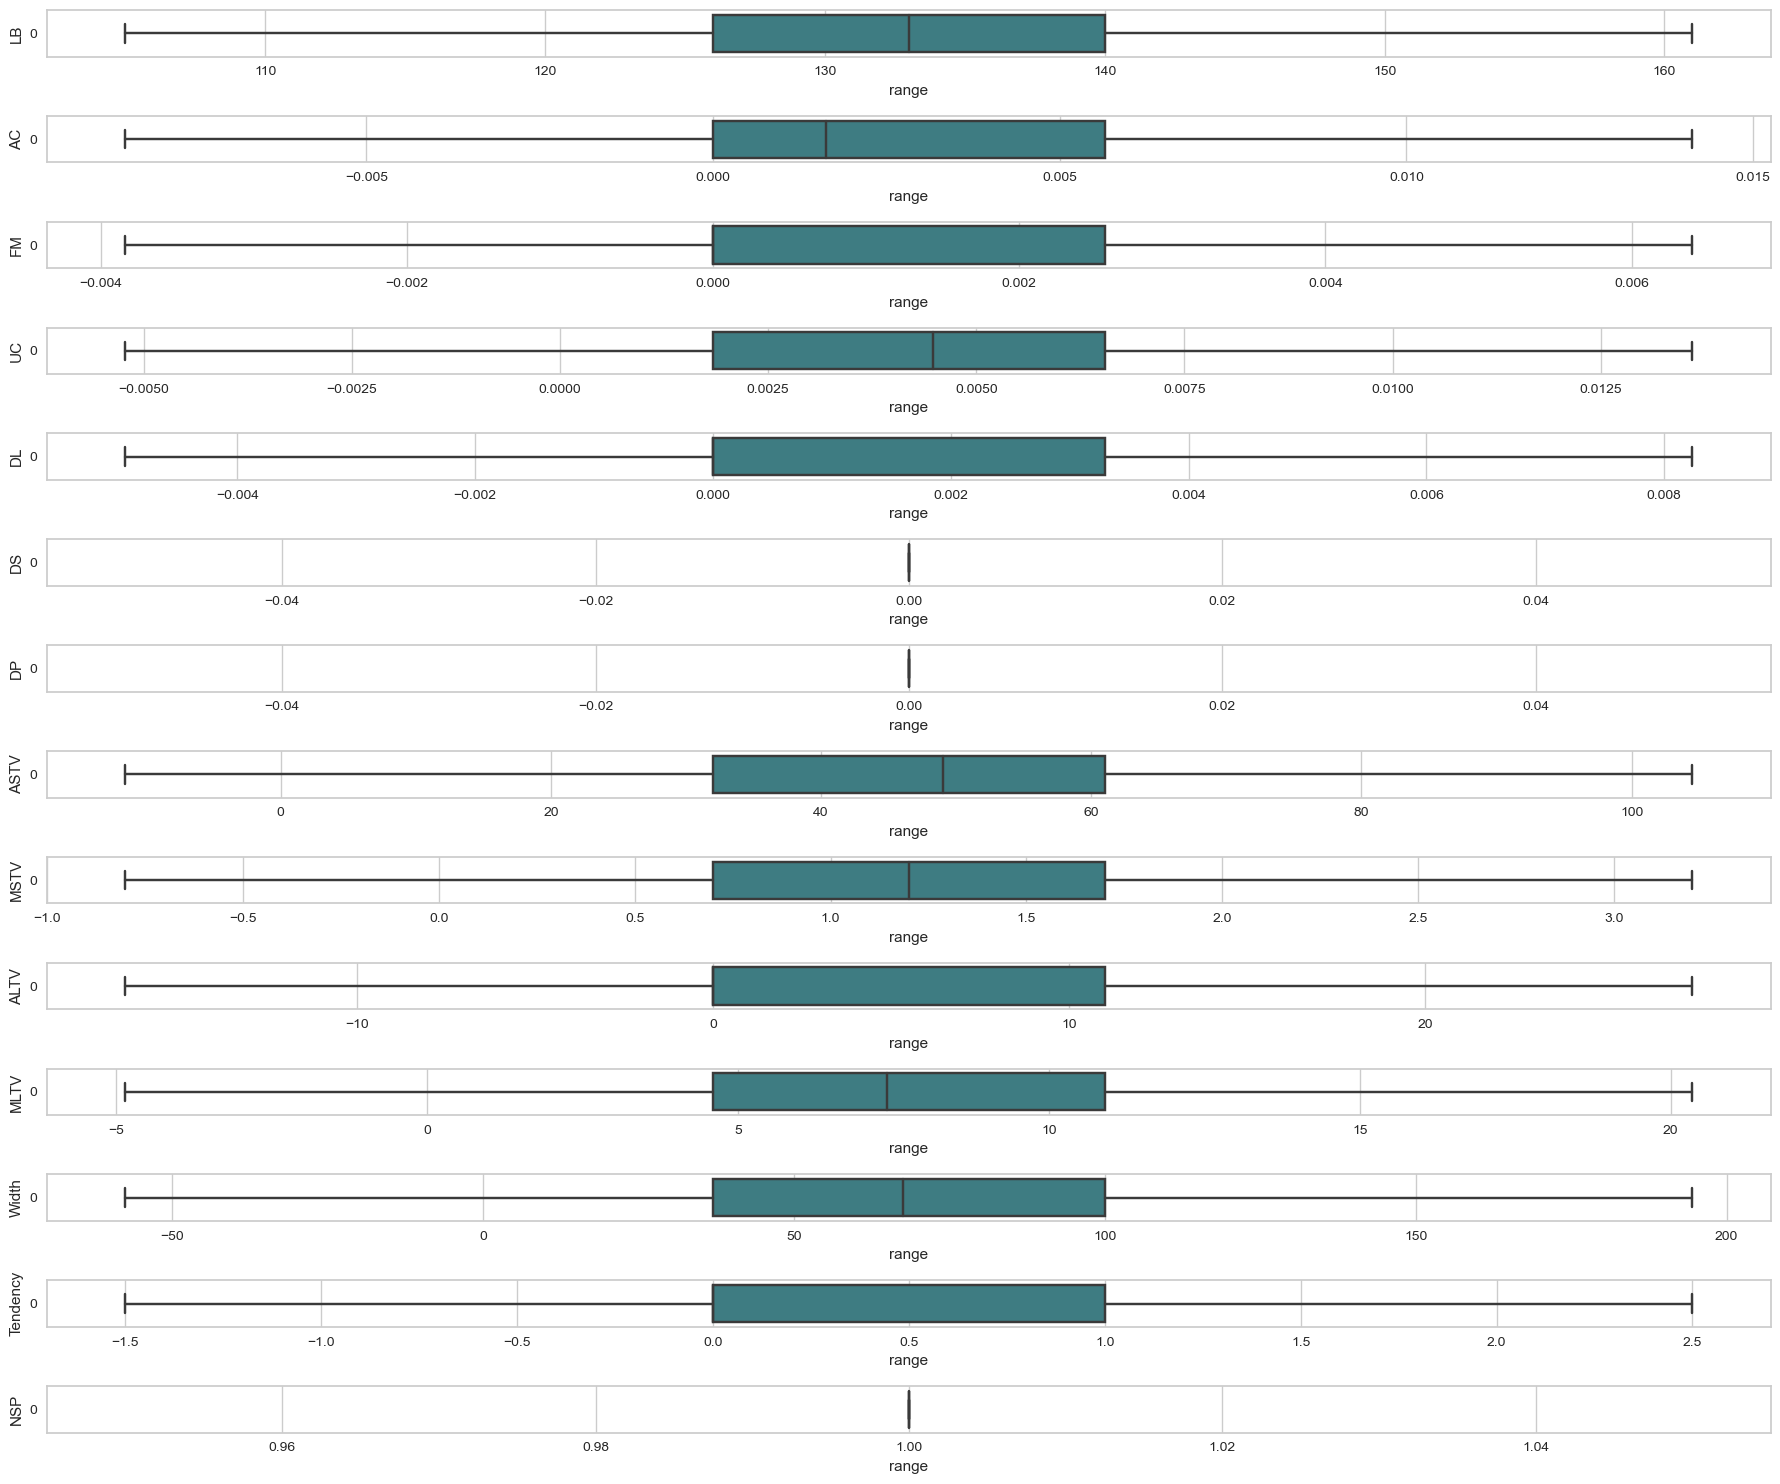

In [71]:
fig, axes = plt.subplots(14,1, figsize=(18,15) )  # 10 rows, 1 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create box plots
for ax, col in zip(axes, data_cleaned3.columns):
    sns.boxplot(data_cleaned3[col], palette = "crest", ax=ax, orient="h")  # Plot plot on the specified subplot
    ax.set_ylabel(col)  # box plots often use "range" as x-axis label
    ax.set_xlabel("range")

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

### 
- Center line: The horizontal line in the middle of the box represents the median LB value. This means half the fetuses have LB values above this line and half have values below.

- Box: The box represents the interquartile range (IQR). The IQR encompasses the middle 50% of the data. The bottom edge of the box is the first quartile (Q1), and the top edge is the third quartile (Q3).

- Whiskers: The lines extending from the box are the whiskers. They typically extend to the most extreme data points that are not considered outliers.

Outliers: Any data points beyond the whiskers are considered outliers. They are represented by individual dots or asterisks.

# <font color = "ff0055"> Kernel Density <a class="anchor" id="4.2"></a>

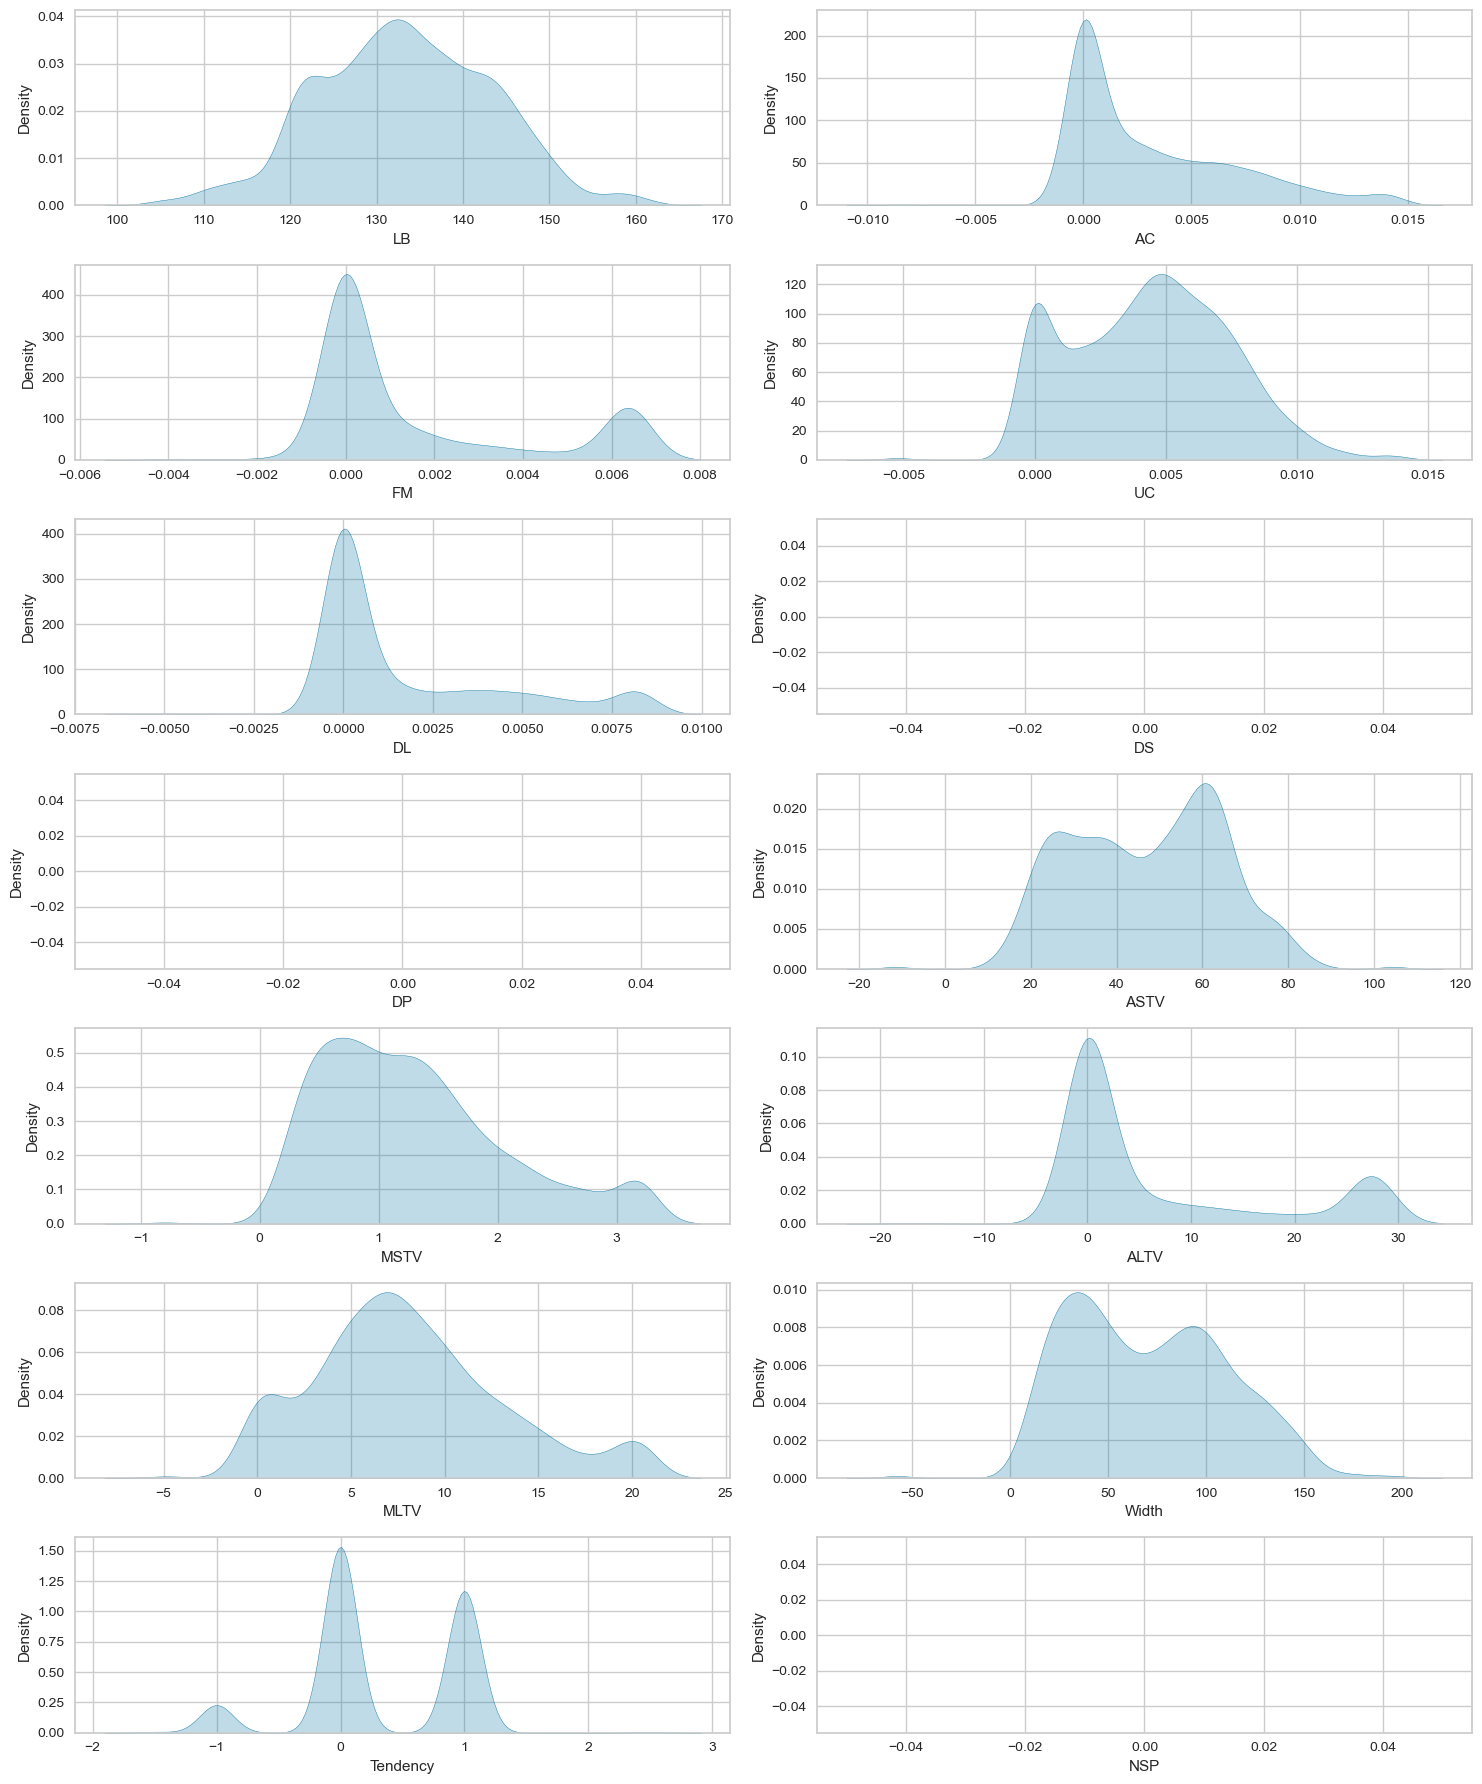

In [72]:
# Create a 5*2 grid of subplots
fig, axes = plt.subplots(7,2, figsize = (15,18))  # 5 rows, 2 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create KDE plots
for ax, col in zip(axes, data_cleaned3.columns):
    sns.kdeplot(data=data_cleaned3[col], ax=ax, shade=True)  # Plot KDE on the specified subplot
    ax.set_ylabel('Density')  # KDE plots often use "Density" as y-axis label

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

### <font color = "ff0055"> Kernel Density:
- Baseline fetal heart rate (LB): This is the average fetal heart rate over a period of time (beats per minute).

- Uterine contractions (UC): This refers to the frequency and intensity of contractions during labor.

- Short-term variability (ASTV, MSTV): This reflects the beat-to-beat variations in the fetal heart rate over a short period.

- Distribution: The shape of the curve in the density plot indicates the distribution of the data points for that variable.

    - A symmetrical, bell-shaped curve suggests a normal distribution, where most data points cluster around the average value.

    - A curve skewed to the right (positive skew) means there are more data points towards the lower end of the range.

    - A curve skewed to the left (negative skew) means there are more data points towards the higher end of the range.

- Density: The height of the curve at any point represents the density of data points at that value. Higher values on the y-axis indicate that more data points fall within that range

#### [Table of Contents](#0.1)

# <font color = "ff0055"> Distplot To Visualize The Distribution <a class="anchor" id="4.3"></a>

 - X-axis: This represents the values of the variable being visualized (e.g., heart rate in beats per minute for baseline fetal heart rate).

 - Y-axis: This represents the density or frequency of data points. Higher values on the y-axis indicate that more data points fall within that range of the variable.

 - The Shape of the Distribution: The shape of the curve can tell you a lot about the distribution of the data.

 - A symmetrical bell-shaped curve suggests a normal distribution, which means most of the data points cluster around the average  value.

 - A curve skewed to the right (positive skew) means there are more data points towards the lower end of the x-axis.

 - A curve skewed to the left (negative skew) means there are more data points towards the higher end of the x-axis.

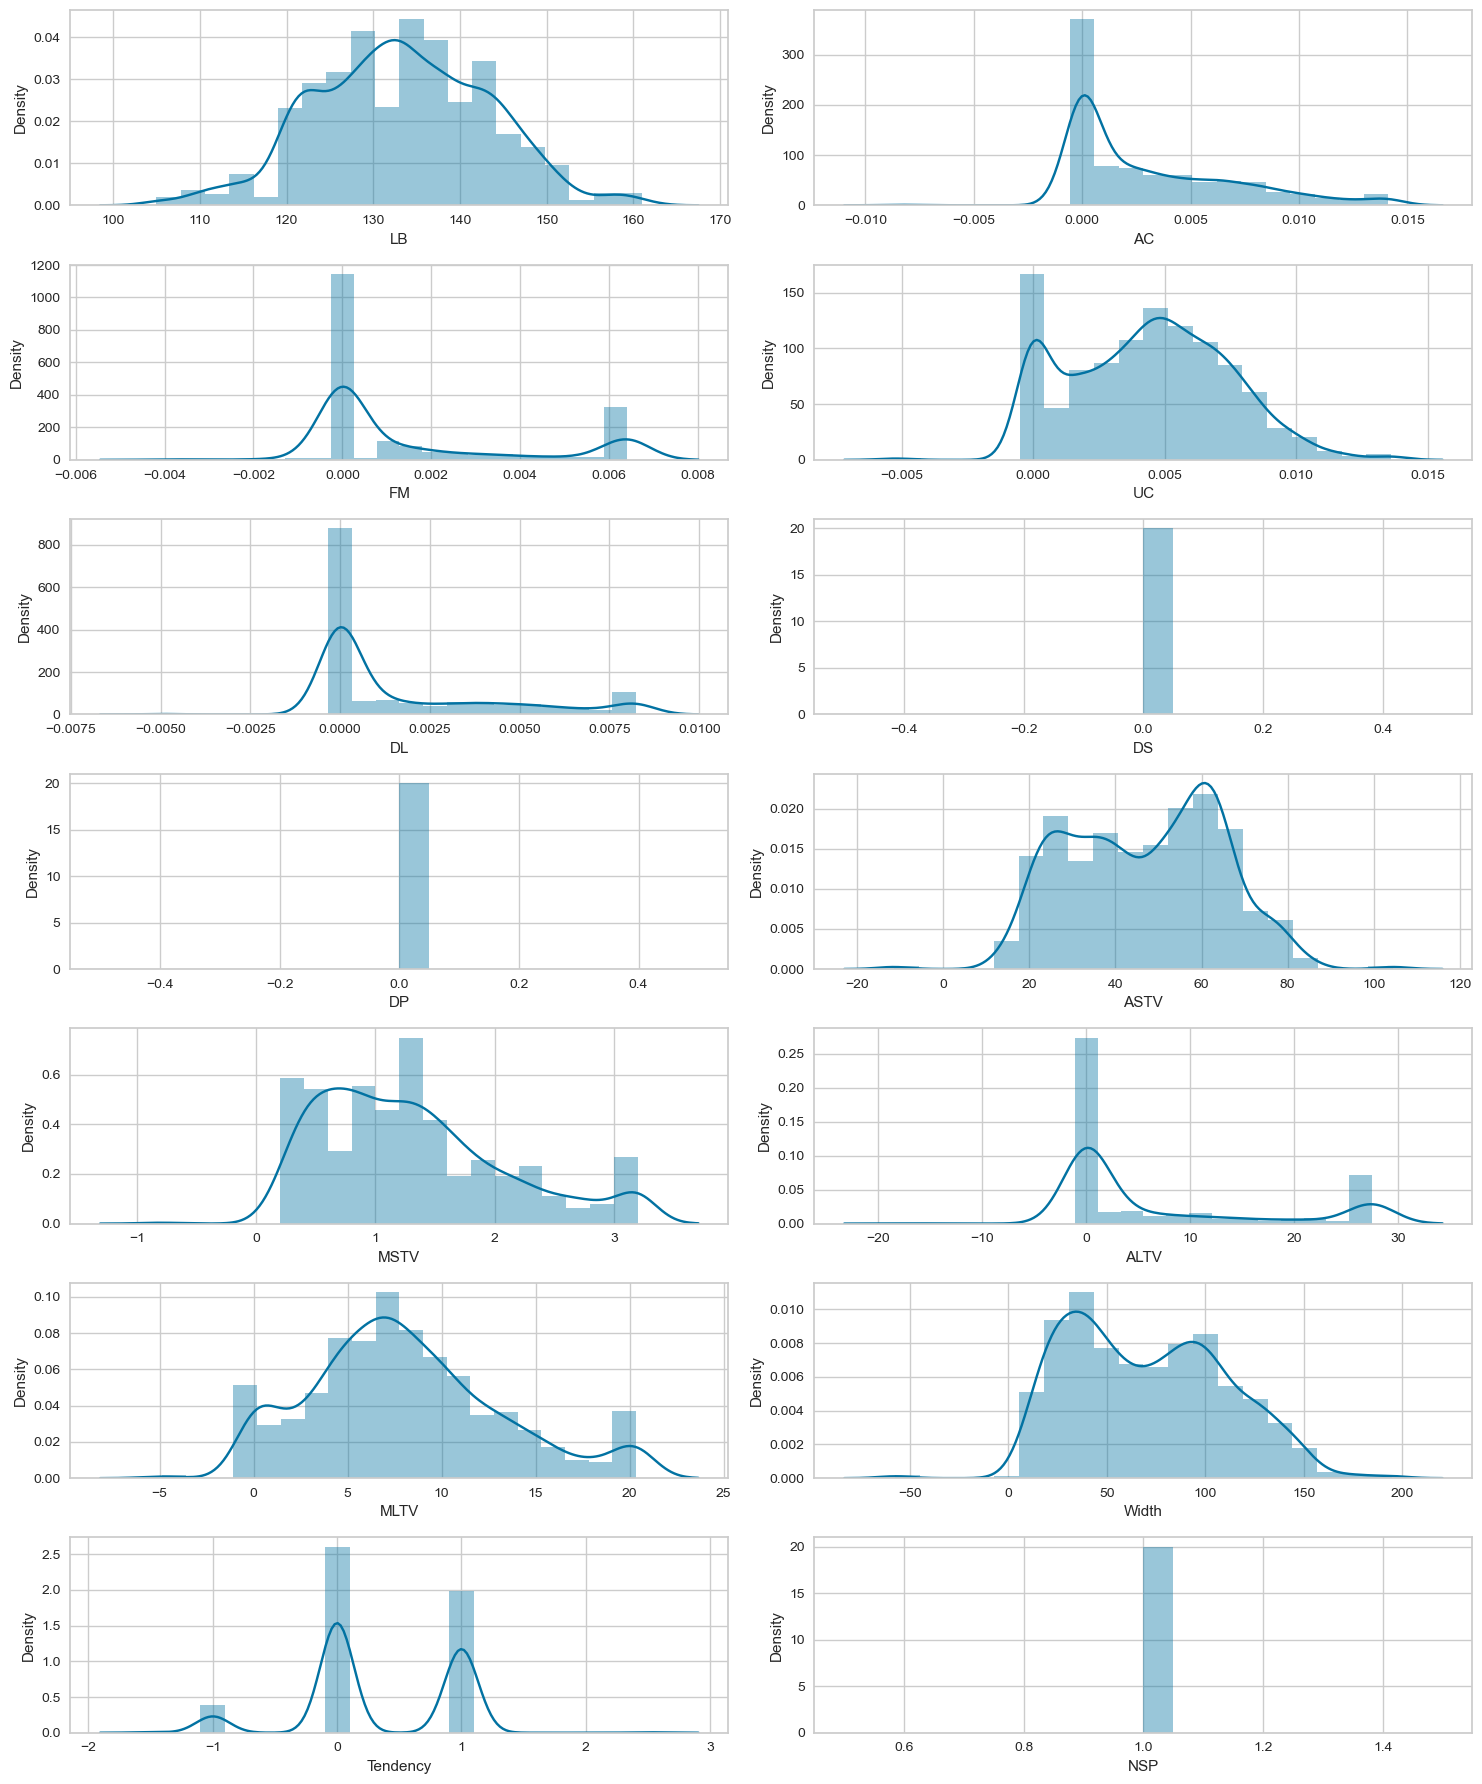

In [73]:
fig, axes = plt.subplots(7,2, figsize=(15,18))  # 5 rows, 2 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create KDE plots
for ax, col in zip(axes, data_cleaned3.columns):
    sns.distplot(data_cleaned3[col], ax=ax, bins=20)  # Plot KDE on the specified subplot
    ax.set_ylabel('Density')  # KDE plots often use "Density" as y-axis label

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

# <font color = "ff0055"> Scatterplot For Analyzing Outliers <a class="anchor" id="4.4"></a>

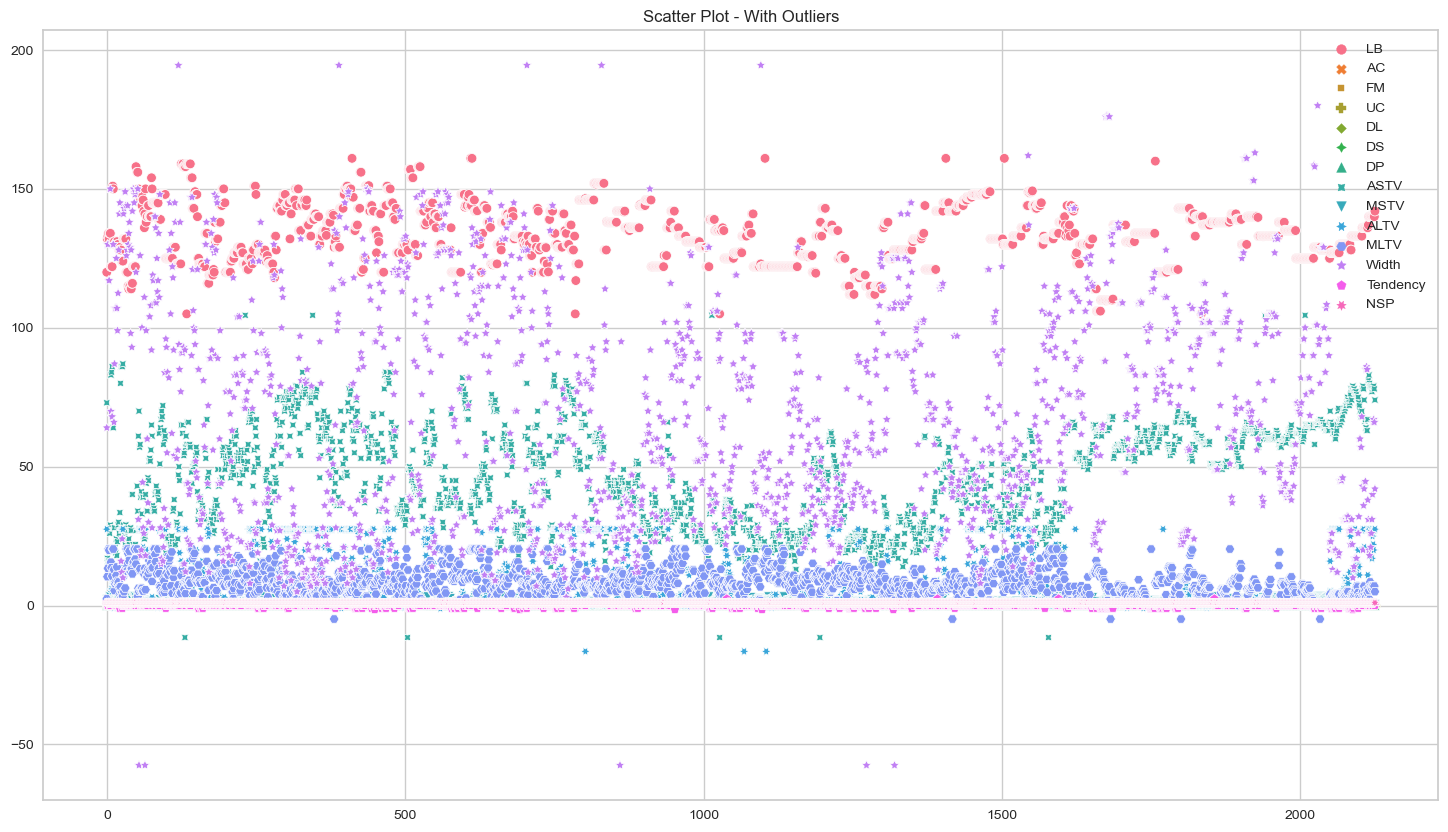

In [74]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=data_cleaned3)
plt.title("Scatter Plot - With Outliers")
plt.show()

# <font color = "ff0055"> Pair Plots: to explore relationships between pairs of variables.<a class="anchor" id="4.5"></a>
    
 - A positive correlation would be visualized by a trend where points go up together from bottom left to top right. 
   
 - A negative correlation would be visualized by a trend where points go down together from top left to bottom right. 
   
 - No clear trend suggests a weak or neutral correlation

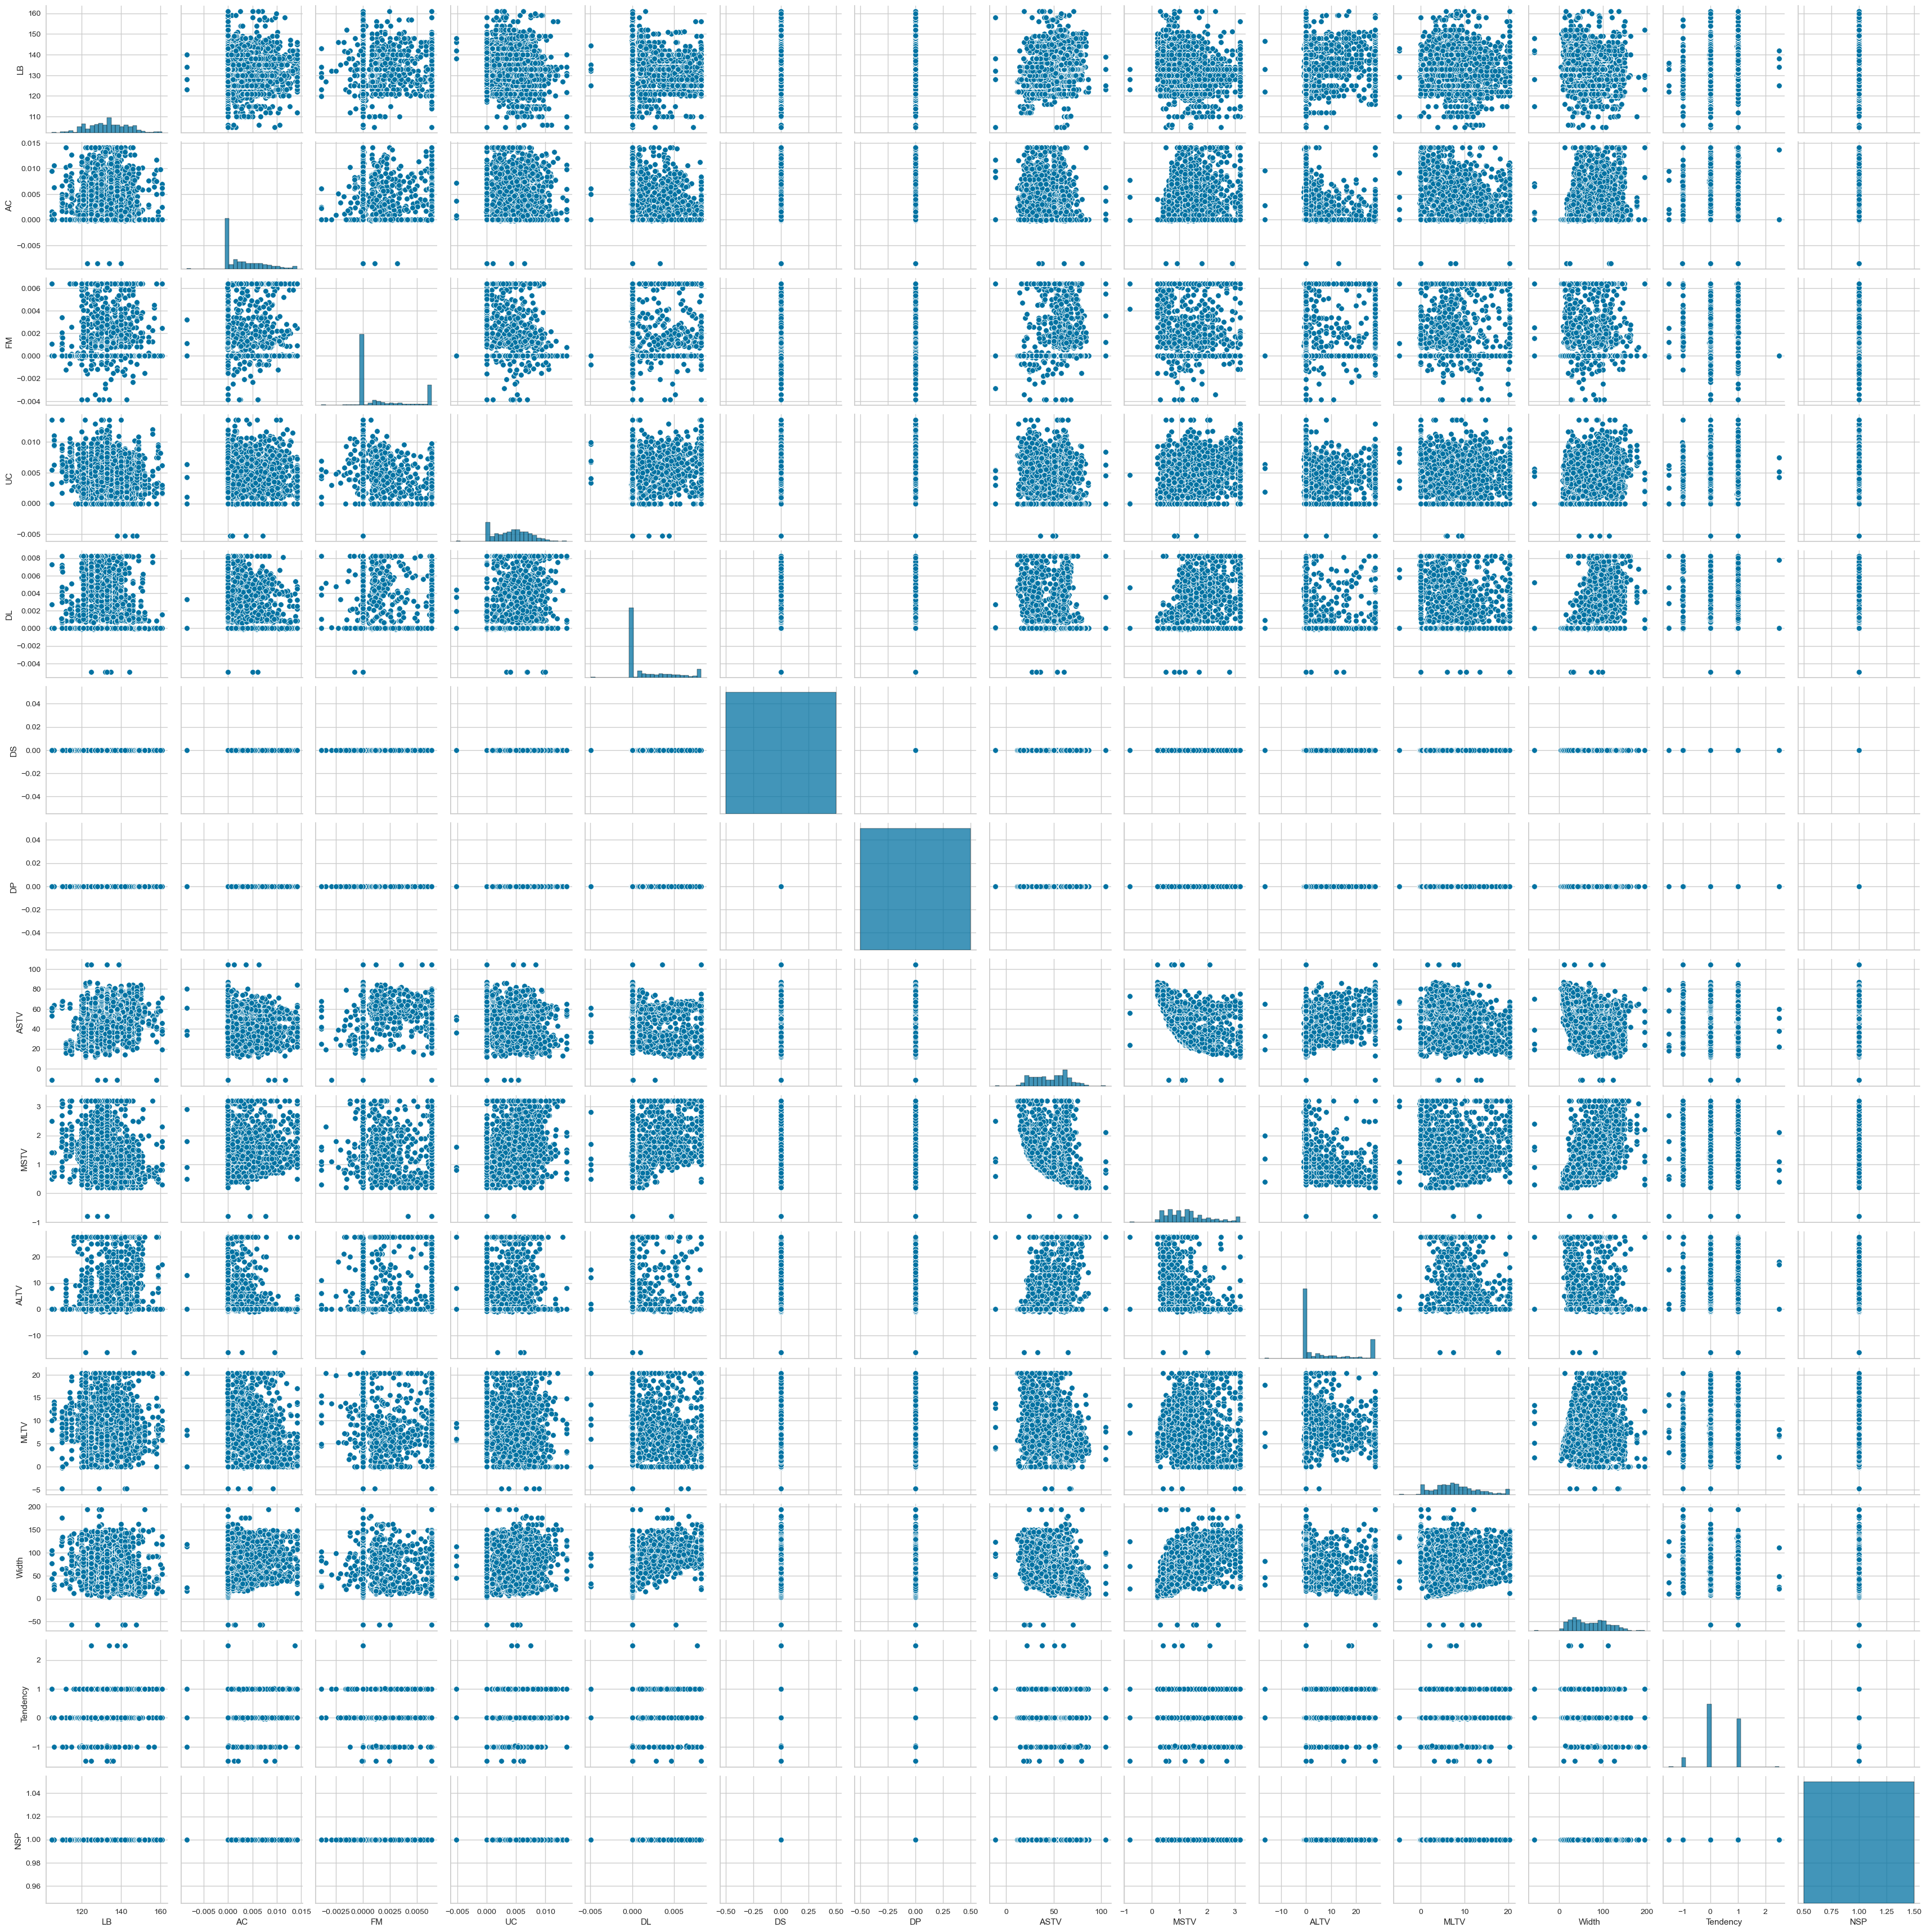

In [75]:
# Visualize the data using seaborn
sns.pairplot(data_cleaned3)

### <font color = "ff0055"> PairPlot of fetal health data:

* **Positive correlations:**
    * **Baseline fetal heart rate (LB) might have a positive correlation with mean value of short-term variability (MSTV).**
    * **Uterine contractions (UC) might have a positive correlation with percentage of time with abnormal short-term variability (ASTV). 
* **Negative correlations:**
    * **Baseline fetal heart rate (LB) might have a weak negative correlation with deceleration late (DL). 
    * **Mean value of long-term variability (MLTV) might have a weak negative correlation with uterine contractions (UC).**

 * **Neutral correlations:**
    * **Baseline fetal heart rate (LB) might have a neutral correlation with fetal movements (FM).** 

# <font color = "ff0055">  Heatmaps to explore correlation relationships between pairs of variables.<a class="anchor" id="4.6"></a>

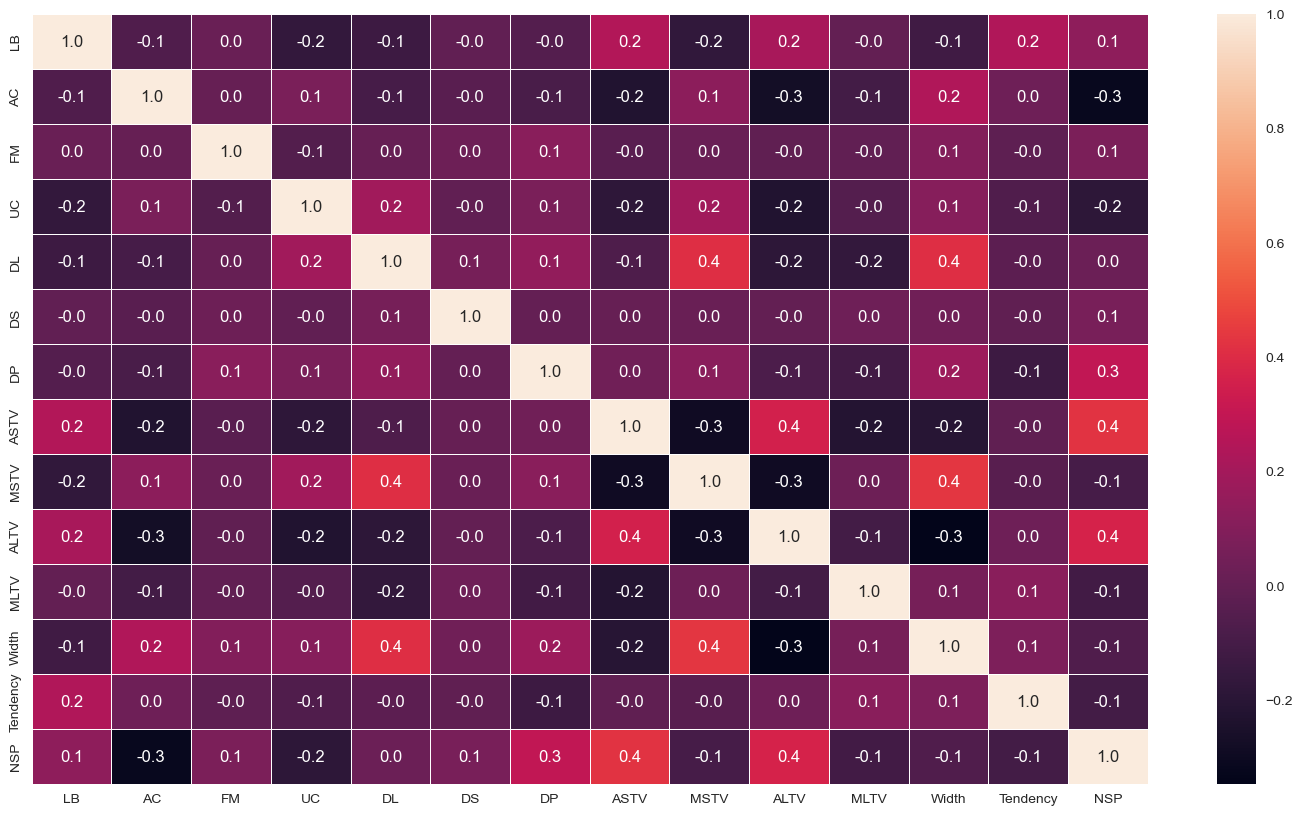

In [76]:
f,ax = plt.subplots(figsize=(18,10))
sns.heatmap(data_cleaned2.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

### <font color = "ff0055"> based on the heatmap here are some key findings in the correlation between variables:

* **Positive correlations:**
  * There is a strong positive correlation between **baseline fetal heart rate (LB)** and **mean value of short-term variability (MSTV)**. This suggests that fetuses with higher baseline heart rates also tend to have higher variability in their heart rate.
  * There is a moderate positive correlation between **uterine contractions (UC)** and **percentage of time with abnormal short-term variability (ASTV)**. This means that when there are more uterine contractions, there is a higher likelihood of abnormal short-term variability in the fetal heart rate. 
  * There is a weak positive correlation between **fetal movements (FM)** and **accelerations (AC)**. This suggests that there might be a slight increase in accelerations when there are fetal movements.

* **Negative correlations:**
  * There is a weak negative correlation between **baseline fetal heart rate (LB)** and **deceleration late (DL)**. This means that there might be a slight decrease in late decelerations when the baseline fetal heart rate is higher.
  * There is a weak negative correlation between **mean value of long-term variability (MLTV)** and **uterine contractions (UC)**. This suggests that there might be a slight decrease in long-term variability when there are uterine contractions.

* **Neutral correlations:**
  * There seems to be a neutral correlation between **baseline fetal heart rate (LB)** and **fetal movements (FM)**. 
  * There seems to be a neutral correlation between most of the other variables. 

#### [Table of Contents](#0.1)

# <font color = "ff0055"> 5. Conclusion: <a class="anchor" id="5"></a>

# <font color = "ff0055"> **Key Findings**: <a class="anchor" id="5.1"></a>
**1.Data Exploretion: I have a good understanding of what each variable (LB, AC, FM etc.) represents. 
  Look for additional information about the data format. Is it a table with timestamps for each measurement or a continuous recording requiring segmentation?

**2. Data Cleaning and Preprocessing:**

* Since this is likely simulated data, i have cleaned.the data often has missing values or inconsistencies. identify and handle those.

**3. Exploring Relationships:**

* This is where the heatmap comes in. we can calculate correlation coefficients between each pair of variables (LB vs AC, FM vs UC etc.). The heatmap will then visually represent these correlations, with red indicating strong positive correlations, blue indicating strong negative correlations, and white/grey indicating weak correlations.

**4. Feature Engineering (Optional):**

* create new features from existing ones. For example, i have calculate the average duration of accelerations (AC) or the frequency of uterine contractions (UC).

**5. Visualization (beyond the heatmap):**

* Depending on the assignment requirements, I have create other visualizations to support the findings. Scatter plots might be useful to see how individual data points relate to each other, while time series plots could show how variables change over time.


# <font color = "ff0055"> Data Summary: <a class="anchor" id="5.2"></a>

### <font color = "ff0055"> Data Exploration, Outliers, Missing Values, and relation between the pair of variables
1. Data Exploration:
    - **Dataset Overview**:
    In the process of exploring the "cardiographic.csv" dataset, several issues were identified, including the presence of outliers, missing values, and columns with statistical summaries indicating zero values for mean, median, and standard deviation.NSP,DS,DP,FM columns have mean, median, and standard deviation values nearly equal to zero
2. **Duplicate Values**:
    - **Detection Of Duplicate Values**:numerous columns contain significant `Duplicate Values`, finding the duplicate data varies across the columns to using `duplicate()` functions.
    - **Handling Duplicate values**: i have to drop the duplicate values to use `drop_duplicate()` function from the data

2. **Missing Values**:
   - **Extent**: Multiple columns in the dataset have missing values. The proportion of missing data varies across columns.
   - **Identification**: Missing values were identified using the `isnull().sum()` method, which highlighted the count of missing entries in each column.
           - **Handling**: Strategies to handle missing values remove the null values using `dropna()`, deletion of rows/columns, to creat a iteration loop and using algorithms that support missing values inherently.
3. **Outliers**:
   - **Prevalence**: Numerous columns contain significant outliers, which can potentially skew the analysis and affect the accuracy of any predictive models.
   - **Detection**: Outliers were identified using visualizations such as box plots and create a statistical measures like the interquartile range (IQR) 
   - **Impact**: These outliers can indicate abnormal data entries or genuine rare events, which require careful consideration. Depending on the context, outliers may need to be treated by include Imputing outliers involves replacing them with a the lower bound and upper bound 
4. correlation between the data:

    I have created a pair plot and heatmap to visualize the relationships between different variables in the data. By looking for trends in the scatter plots, i have identified potential correlations between variables like:

    - Positive correlation between baseline heart rate (LB) and mean short-term variability (MSTV).

    - Positive correlation between uterine contractions (UC) and abnormal short-term variability (ASTV).

    - Weak negative correlation between baseline heart rate (LB) and late decelerations (DL).

    I have also created a density plot to visualize the distribution of a single variable like baseline heart rate (LB) or uterine contractions (UC). The shape of the curve would indicate if the data is normally distributed or skewed.
